# Exercise 2: Data Processing and Analysis

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()
##%pip install --upgrade matplotlib

##%pip install --upgrade matplotlib ipython jupyter

##try:
 ##   from gofer.ok import check
##except:
   ## %pip install git+https://github.com/grading/gradememaybe.git
 ##   from gofer.ok import check

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [43]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch_original = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [44]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [45]:
minimumHeartRate = float(smartwatch['Heart Rate (BPM)'].min())
maximumHeartRate = float(smartwatch['Heart Rate (BPM)'].max())

minimumHeartRate, maximumHeartRate

(40.0, 296.5939695131042)

In [46]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [47]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 



outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [48]:
print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [49]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)



      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [50]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [51]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_1482/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_1482/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [52]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])
smartwatch['Heart Rate (BPM)'] = smartwatch['Heart Rate (BPM)'].apply(lambda x: x if x < 200 and x > 0 else HeartRateMean) ## chat gpt

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(smartwatch['Heart Rate (BPM)'])
print(fullTableHRMean)
print(smartwatch.isnull().sum())

0       58.939776
1       75.132684
2       75.132684
3       40.000000
4       61.950165
          ...    
9995    78.819386
9996    48.632659
9997    73.834442
9998    75.132684
9999    70.063864
Name: Heart Rate (BPM), Length: 10000, dtype: float64
75.13268404820141
User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


In [53]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

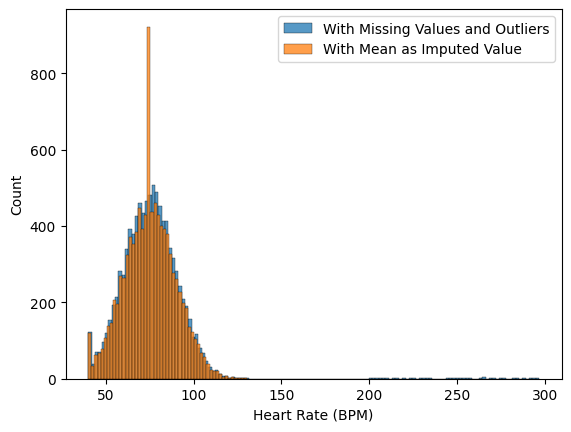

In [54]:
sns.histplot(smartwatch_original['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

I would expect the imputation method to move the median values closer to the mean. Given that the graph is slightly right skewed, I would expect the median to be higher without the imputations than with them. The medians that resulted are essentially the same, with the one without the imputations very slightly higher but not to a significant extent.

In [55]:
## coding cell to check the difference in median values 

HeartRateMedian = heartrateRows['Heart Rate (BPM)'].median()
print(HeartRateMedian)

smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMedian = smartwatch_hr['Heart Rate (BPM)'].median()
print(fullTableHRMedian)


75.14626274239524
75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [56]:
##print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [57]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

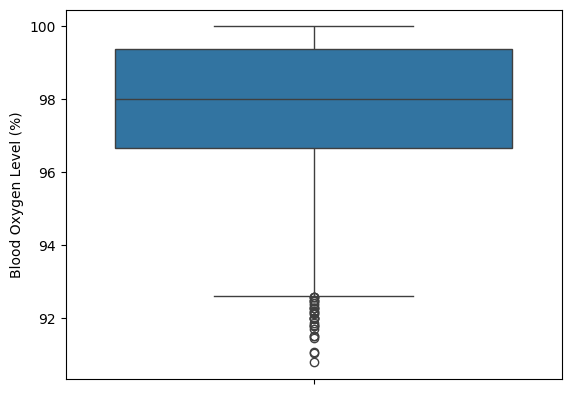

In [58]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

I do not think the outliers should be excluded because they do not fall outside of what is a survivable range and hence are data worth considering. For the missing values, I believe imputing them with the average blood oxygen is the most appropriate way to handle them.

In [59]:
## use this space or additional cells to deal with the missing/outlier values. 
##nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]
##nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean

##print(len(outlierHeartRaterows) + len(nullHeartRaterows))
##heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]


nullOxygen = smartwatch[smartwatch['Blood Oxygen Level (%)'].isnull()]
print(len(nullOxygen))
nullOxygen.loc[:, 'Blood Oxygen Level (%)'] = meanBloodO2
nonNullOxygen = smartwatch[~smartwatch['Blood Oxygen Level (%)'].isnull()]

bloodo2 = pd.concat([nonNullOxygen, nullOxygen]) ##chatgpt: how do i change it so that smartwatch_o2 consists of the corrected null values and also the original non-null values in the dataset?
smartwatch['Blood Oxygen Level (%)'] = smartwatch['Blood Oxygen Level (%)'].apply(lambda x: meanBloodO2 if pd.isna(x) else x) ##chat gpt

print(smartwatch.isnull().sum())
bloodo2



300
User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,75.132684,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9834,4840.0,64.803112,97.841581,1647.308449,8.04238137746177,Highly Active,7
9861,3942.0,57.617790,97.841581,14269.737149,6.390686112594759,Highly_Active,9
9885,4028.0,75.281591,97.841581,3852.160740,8.970316986352344,Actve,NaN
9905,3603.0,87.693723,97.841581,2364.028205,3.5490963940132865,Seddentary,3


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [60]:
##minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [61]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

I decided not to exclude any high outlier values because even the high numbers seemed to potentially be consistent with an active lifestyle, rather than a measurement error. For the null values and values less than 10 steps, I imputated them with the average. I figured that less than 10 steps/day seems implausible. It is a fairly arbitrary decision to make the cutoff at 10 steps, but I assumed that fewer than 10 steps probably indicates the person wasn't wearing their smart watch with great frequency or the steps were not being calculated correctly.

<Axes: ylabel='Step Count'>

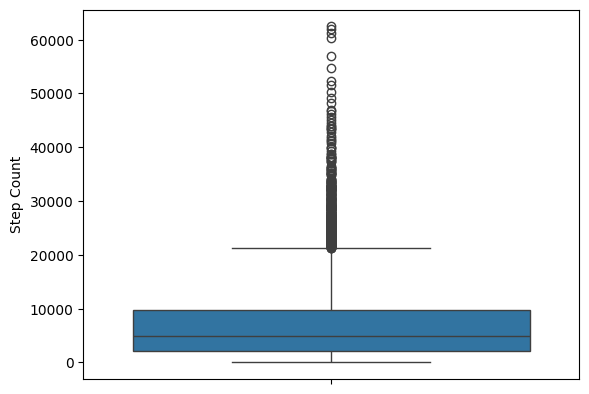

In [62]:
sns.boxplot(smartwatch['Step Count'])

In [63]:
##exclude average step counts of less than 10 steps/day - seems very implausible and maybe the person was not wearing their fitness tracker
##outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
outlierSteps = smartwatch[smartwatch['Step Count'] < 10]
outlierSteps['Step Count'] = meanSteps
outlierSteps

/tmp/ipykernel_1482/3527735214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSteps['Step Count'] = meanSteps


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
908,1823.0,70.061523,97.281980,6985.685885,2.494171838826327,Actve,5
1676,4090.0,67.620800,98.054164,6985.685885,6.6707802664917955,Highly_Active,6
2349,3126.0,75.132684,98.348774,6985.685885,9.306370985176311,Highly_Active,1
2906,4568.0,77.366649,100.000000,6985.685885,6.4365697894256035,Actve,1
3470,4631.0,87.045706,95.438054,6985.685885,6.886368326260279,Highly_Active,2
4269,1459.0,66.718199,97.692257,6985.685885,3.6787050265976875,Highly_Active,1
5276,2995.0,54.902888,99.969104,6985.685885,4.216428331015367,Highly_Active,10
5816,3873.0,67.213110,100.000000,6985.685885,4.48053870287441,Sedentary,9
6211,1963.0,75.132684,100.000000,6985.685885,6.112553578677665,Sedentary,1
7489,1366.0,45.719594,99.576891,6985.685885,NaN,Actve,1


In [64]:
## use this space or additional cells to address the missing or outlier data. 
##nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

##print(len(outlierHeartRaterows) + len(nullHeartRaterows))
##nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
##heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]


# Reset the index of both the DataFrame and the Series
#final_table = final_table.reset_index(drop=True)
#column_to_assign = column_to_assign.reset_index(drop=True)


nullStepCount = smartwatch[smartwatch['Step Count'].isnull()]
print(len(nullStepCount))
nullStepCount['Step Count'] = meanSteps
notNullStepCount = smartwatch[~smartwatch['Step Count'].isnull()]

steps = pd.concat([nullStepCount, notNullStepCount])

smartwatch['Step Count'] = smartwatch['Step Count'].apply(lambda x: meanSteps if x <= 10 or pd.isna(x) else x)

smartwatch.isnull().sum()





100


/tmp/ipykernel_1482/2637134446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullStepCount['Step Count'] = meanSteps


User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [65]:
##minSteps = smartwatch['Step Count'].min()
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [ ]:
for x in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(x)  ## first try to see if it can be converted to a number
    except:
        print(x)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [ ]:
errorTable = smartwatch[smartwatch['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
62,3068.0,115.078288,99.928041,1918.372142,ERROR,Highly_Active,4
71,3041.0,64.799778,94.743857,4613.859266,ERROR,Highly_Active,10
81,4499.0,41.709895,96.857347,1413.015778,ERROR,Highly_Active,4
92,2021.0,70.243810,97.171134,2336.583406,ERROR,Highly Active,7
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,ERROR,Active,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [ ]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_1820/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,247.803052,97.052954,2826.521994,NaN,Highly Active,5
62,3068.0,115.078288,99.928041,1918.372142,NaN,Highly_Active,4
71,3041.0,64.799778,94.743857,4613.859266,NaN,Highly_Active,10
81,4499.0,41.709895,96.857347,1413.015778,NaN,Highly_Active,4
92,2021.0,70.243810,97.171134,2336.583406,NaN,Highly Active,7
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,NaN,Active,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [66]:
## create a copy of the table 
smartwatch_sleep = smartwatch

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1
1,NaN,75.132684,98.532195,727.601610,6.538239,Highly_Active,5
2,1860.0,75.132684,97.052954,2826.521994,NaN,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4
9998,4907.0,75.132684,98.401058,3364.788855,5.691234,Active,8


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [67]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

maxSleep = smartwatch['Sleep Duration (hours)'].max()

meanSleep = smartwatch['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406444))

In [68]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

Lower than 2 hours a night of sleep seems implausible and potentially indicative of a measurement error. I chose to impute these values with the average. I also imputed missing values with the average.

In [69]:
##deal with missing values
missingSleep = smartwatch[smartwatch['Sleep Duration (hours)'].isnull()]
missingSleep['Sleep Duration (hours)'] = meanSleep

/tmp/ipykernel_1482/489173860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingSleep['Sleep Duration (hours)'] = meanSleep


In [70]:
## use this space or additional cells to address the missing or outlier data. 

outlierSleepHours = smartwatch[smartwatch['Sleep Duration (hours)'] < 2]
outlierSleepHours['Sleep Duration (hours)'] = meanSleep
notOutlierSleepHours = smartwatch[smartwatch['Sleep Duration (hours)'] >= 2]

smartwatch['Sleep Duration (hours)'] = smartwatch['Sleep Duration (hours)'].apply(lambda x: meanSleep if x < 2 or pd.isna(x) else x)

smartwatch_updated_sleep = pd.concat([outlierSleepHours, notOutlierSleepHours, missingSleep])
smartwatch_updated_sleep


/tmp/ipykernel_1482/1555990945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleepHours['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
252,1709.0,77.099211,97.841581,3465.970911,6.505463,Highly Active,9
2133,4401.0,91.964082,97.171460,652.741730,6.505463,Actve,1
2492,3936.0,73.018575,100.000000,3546.105365,6.505463,Actve,3
2634,2712.0,53.079149,94.937905,1955.915367,6.505463,Active,2
2910,3009.0,93.576744,97.150920,3377.584984,6.505463,Active,2
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,6.505463,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,6.505463,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,6.505463,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,6.505463,Active,4


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [71]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
The description "very high" isn't very informative, so I decided to imputate it with the mean. I initially thought assigning it the third quartile value felt appropriate, but eventually decided that felt very arbitrary and decided to treat it the same as a null value.

In [72]:
## cell to deal with 'Very High' value
##third_quartile = np.percentile(data, 75) - chatgpt: how to get the 3rd quartile of a dataset

##calculate the mean quartile value to replace "very high" values and null values with
numericStress = pd.to_numeric(smartwatch['Stress Level'], errors='coerce').dropna() ##chat gpt
second_quartile = np.percentile(numericStress, 50) ##chat gpt

smartwatch['Stress Level'] = pd.to_numeric(smartwatch['Stress Level'], errors='coerce')

smartwatch_stress = smartwatch['Stress Level'].fillna(second_quartile, inplace=True)

smartwatch_stress
smartwatch['Stress Level'] = smartwatch['Stress Level'].apply(lambda x: x if x > 0 else second_quartile)

smartwatch.isnull().sum()


/tmp/ipykernel_1482/3065392741.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smartwatch_stress = smartwatch['Stress Level'].fillna(second_quartile, inplace=True)


User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level                0
dtype: int64

Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [73]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [74]:
## Highly Active 
highlyActive = smartwatch[(smartwatch['Activity Level'] == 'Highly Active') | (smartwatch['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active


active = smartwatch[(smartwatch['Activity Level'] == 'Actve') | (smartwatch['Activity Level'] == 'Active')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2


## Sedentary 
sedentary = smartwatch[(smartwatch['Activity Level'] == 'Seddentary') | (smartwatch['Activity Level'] == 'Sedentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = smartwatch
final_table = pd.concat([highlyActive, active, sedentary, smartwatch[smartwatch['Activity Level'].isnull()]])
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")


/tmp/ipykernel_1482/3892013882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_1482/3892013882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_1482/3892013882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [75]:
final_table.isnull().sum()


User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level                0
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [76]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            10000 non-null  float64
 7   NumActivity             9800 non-null   float64
dtypes: float64(7), object(1)
memory usage: 703.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

The smaller the "s" parameter is, the smaller the dots are and hence more well defined. The 0.1 dots make outliers hard to see, but 0.5 seems like a readable size.

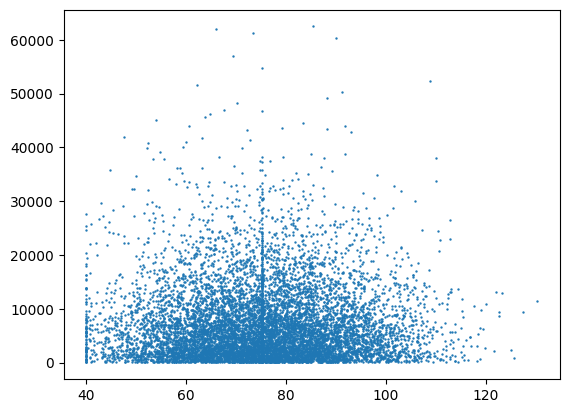

In [ ]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s = 0.5)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

There is much more variation with the unclean data compared to the cleaned data. The outliers also push the values that should be absorbed into the corner in the unclean data which makes it really hard to observe the potential patterns within the significant data.

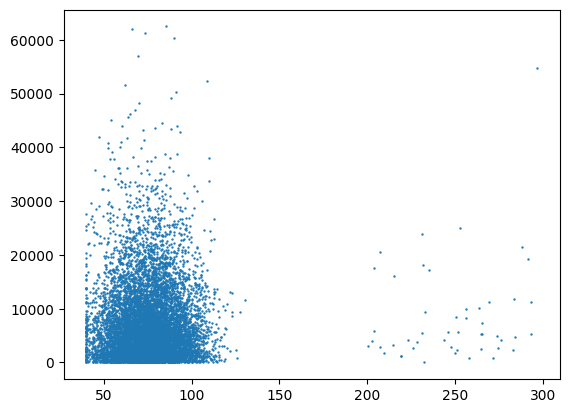

In [ ]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')
plt.scatter(smartwatch['Heart Rate (BPM)'], smartwatch['Step Count'], s = 0.5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: ylabel='Step Count'>

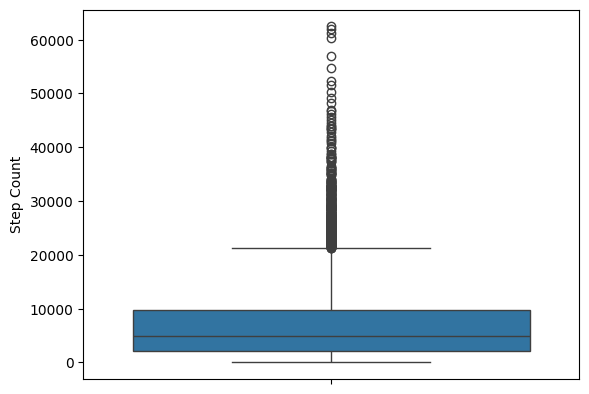

In [ ]:
## Visualization 

sns.boxplot(final_table['Step Count'])


In [77]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['NumActivity'] == 3]  ## sedentary rows
act = final_table[final_table['NumActivity'] == 2] ## active rows
hact = final_table[final_table['NumActivity'] == 1] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.140, p-value: 0.869


Is there significant difference between the groups' step counts?  

ANSWER:

There is not a significant difference between the groups' step counts - the p-value of 0.869 indicates that there is likely no correlation between step count and activity level. The F statistic of 0.140 suggests that the variability within the columns is greater than the correlation and thus the relationship between the two columns is not significant.

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

Because there was no correlation between Step Count and Activity Level, I would want to communicate to the public that simply trying to hit a specific step count does not necessarily mean they are engaging in meaningful physical activity that will help them become healthier. It also seems that, as a whole, people were getting well below the recommended 8 hours of sleep. The norm for 8 hours of sleep was designed for white men, and it is possible that different groups need different amounts of sleep. Given that these theoretical people are chronically sleep deprived, it seems that there should either be another study on the sleep needs to various people, as well as laws in place to ensure people's lack of sleep is not due to unfair labor laws (which is likely a significant factor). I would also disclose the original data and the metrics I used to edit the data. Many of the benchmarks I chose were arbitrary - and drawing a line inherently creates an arbitrary guideline. For example, if someone had a heart rate of 199 bpm that isn't really less plausible than a heart rate of 200 bpm yet they would be included. However, for further analysis, removing some outliers was critical and there does need to be a line. Disclosing these metrics would also help people understand the room for error within smartwatch health monitoring systems. If a healthcare provider is recommending a smartwatch to someone to monitor their heart rate and watch for signs of a heart attack, they should know that the system does seem to make mistakes sometimes, and account for that before giving the device to what is likely an elderly person with minimal understanding of how the device works. Taking these actions would help to avoid misrepresenting the data and reinforcing biases.